### __Survey__

In [1]:
import pandas as pd
import os
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [2]:
# Data of all states
folder_path = "./store-meta"

# List to hold all the state dfs
state_dataframes = []

# Loop through each file in the folder and append the df to the list
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        df_state = pd.read_csv(file_path)
        state_dataframes.append(df_state)

# Combine all state DataFrames into one DataFrame
df_states = pd.concat(state_dataframes, ignore_index=True)
df_states

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Eagle Enterprises Inc,"Eagle Enterprises Inc, 1041 Ocean Dr, Homer, A...",0x56c12d9331100c9b:0x1928f20e7115f388,NaN,59.637164,-151.516859,['marine supply store'],4.7,3,NaN,"[['Wednesday', '8AM–5PM'], ['Thursday', '8AM–5...",{'Service options': ['In-store shopping']},Open ⋅ Closes 5PM,"['0x56c12d9423ebd6a9:0x96b71d14c683ace0', '0x5...",https://www.google.com/maps/place//data=!4m2!3...
1,Eagle Enterprises Inc,"Eagle Enterprises Inc, 1041 Ocean Dr, Homer, A...",0x56c12d9331100c9b:0x1928f20e7115f388,NaN,59.637164,-151.516859,['marine supply store'],4.7,3,NaN,"[['Wednesday', '8AM–5PM'], ['Thursday', '8AM–5...",{'Service options': ['In-store shopping']},Open ⋅ Closes 5PM,"['0x56c12d9423ebd6a9:0x96b71d14c683ace0', '0x5...",https://www.google.com/maps/place//data=!4m2!3...
2,Alaska Tent & Tarp,"Alaska Tent & Tarp, 2424 E 5th Ave, Anchorage,...",0x56c897916ab9b4d9:0x334e07a949ef65fc,NaN,61.217106,-149.835767,"['fabric product manufacturer', 'aircraft supp...",4.4,18,NaN,"[['Monday', '8:30AM–5:30PM'], ['Tuesday', '8:3...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 8:30AM,"['0x56c897db88baae1f:0x45abf88c4d62a916', '0x5...",https://www.google.com/maps/place//data=!4m2!3...
3,Valley Dollar Plus & MORE!,"Valley Dollar Plus & MORE!, 481 W Parks Hwy, W...",0x56c8df0f2cbd1b53:0x53d601e0489e104,NaN,61.582763,-149.461998,"['dollar store', 'convenience store', 'grocery...",3.9,26,NaN,"[['Sunday', '11AM–5PM'], ['Monday', '10AM–7PM'...",{'From the business': ['Identifies as veteran-...,Closed ⋅ Opens 10AM Mon,"['0x56c8984829b7a761:0x1bccd85b80a4a2bc', '0x5...",https://www.google.com/maps/place//data=!4m2!3...
4,Sourdough Transfer,"Sourdough Transfer, 600 Driveway St, Fairbanks...",0x51324539aa87c7f1:0x75196ecfedd91c3f,NaN,64.851457,-147.725530,"['mover', 'moving and storage service', 'movin...",4.5,28,NaN,"[['Sunday', 'Closed'], ['Monday', '8AM–5PM'], ...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 8AM Mon,"['0x5132453a013fb1f3:0x1c66f7bcc441028b', '0x5...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341207,Walmart Supercenter,"Walmart Supercenter, 2200 17th St, Spirit Lake...",0x878cb43f39734807:0x7c20fd817a06680a,NaN,43.424338,-95.124478,"['department store', 'clothing store', 'craft ...",3.7,1152,$,"[['Saturday', '7AM–11PM'], ['Sunday', '7AM–11P...","{'Service options': ['Curbside pickup', 'In-st...",NaN,"['0x878cb45b61c0421b:0x63cece1607b24165', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
341208,Foundation Building Materials,"Foundation Building Materials, 4401 112th St, ...",0x87ec27087c545371:0x3a5ffd1d59176776,NaN,41.641094,-93.768668,"['building materials market', 'construction ma...",4.5,18,NaN,"[['Friday', '7AM–4:30AM'], ['Saturday', 'Close...",{'Service options': ['In-store shopping']},NaN,"['0x87ec27087b63f6cb:0xab45fb285f06de23', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
341209,Southern Iowa Oil,"Southern Iowa Oil, 2130 Court Ave, Chariton, I...",0x87e93bc31d68794f:0xe099b19a245c0f19,NaN,41.014260,-93.327017,"['gas station', 'convenience store']",3.6,15,NaN,NaN,NaN,NaN,"['0x87e93ac50fb43091:0x5daba4ef211a0a0', '0x87...",https://www.google.com/maps/place//data=!4m2!3...
341210,Flying J Travel Center,"Flying J Travel Center, 8200 Northwest Blvd, D...",0x87e3b56180231c17:0x7135d41221033ab8,NaN,41.602914,-90.624855,"['truck stop', 'convenience store', 'gas stati...",3.9,933,NaN,"[['Thursday', 'Open 24 hours'], ['Friday', 'Op...","{'Service options': ['In-store shopping', 'Del...",NaN,"['0x87e3b561451f0d83:0x2fbc08d29b5ead3b', '0x8...",https://www.google.com/maps/place//data=!4m2!3...


In [3]:
# Dropping duplicate rows
df_states = df_states.drop_duplicates()
df_states

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Eagle Enterprises Inc,"Eagle Enterprises Inc, 1041 Ocean Dr, Homer, A...",0x56c12d9331100c9b:0x1928f20e7115f388,NaN,59.637164,-151.516859,['marine supply store'],4.7,3,NaN,"[['Wednesday', '8AM–5PM'], ['Thursday', '8AM–5...",{'Service options': ['In-store shopping']},Open ⋅ Closes 5PM,"['0x56c12d9423ebd6a9:0x96b71d14c683ace0', '0x5...",https://www.google.com/maps/place//data=!4m2!3...
2,Alaska Tent & Tarp,"Alaska Tent & Tarp, 2424 E 5th Ave, Anchorage,...",0x56c897916ab9b4d9:0x334e07a949ef65fc,NaN,61.217106,-149.835767,"['fabric product manufacturer', 'aircraft supp...",4.4,18,NaN,"[['Monday', '8:30AM–5:30PM'], ['Tuesday', '8:3...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 8:30AM,"['0x56c897db88baae1f:0x45abf88c4d62a916', '0x5...",https://www.google.com/maps/place//data=!4m2!3...
3,Valley Dollar Plus & MORE!,"Valley Dollar Plus & MORE!, 481 W Parks Hwy, W...",0x56c8df0f2cbd1b53:0x53d601e0489e104,NaN,61.582763,-149.461998,"['dollar store', 'convenience store', 'grocery...",3.9,26,NaN,"[['Sunday', '11AM–5PM'], ['Monday', '10AM–7PM'...",{'From the business': ['Identifies as veteran-...,Closed ⋅ Opens 10AM Mon,"['0x56c8984829b7a761:0x1bccd85b80a4a2bc', '0x5...",https://www.google.com/maps/place//data=!4m2!3...
4,Sourdough Transfer,"Sourdough Transfer, 600 Driveway St, Fairbanks...",0x51324539aa87c7f1:0x75196ecfedd91c3f,NaN,64.851457,-147.725530,"['mover', 'moving and storage service', 'movin...",4.5,28,NaN,"[['Sunday', 'Closed'], ['Monday', '8AM–5PM'], ...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 8AM Mon,"['0x5132453a013fb1f3:0x1c66f7bcc441028b', '0x5...",https://www.google.com/maps/place//data=!4m2!3...
5,Sourdough Transfer,"Sourdough Transfer, 299 W 64th Ave, Anchorage,...",0x56c89786087eb2b5:0xaa26d5f2a0dcfac6,NaN,61.162996,-149.885888,"['mover', 'moving and storage service', 'movin...",4.2,18,NaN,"[['Sunday', 'Closed'], ['Monday', '8AM–5PM'], ...",NaN,Closed ⋅ Opens 8AM Mon,"['0x56c897d2e3117e3d:0x2d77c9f7c8b90a70', '0x5...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341207,Walmart Supercenter,"Walmart Supercenter, 2200 17th St, Spirit Lake...",0x878cb43f39734807:0x7c20fd817a06680a,NaN,43.424338,-95.124478,"['department store', 'clothing store', 'craft ...",3.7,1152,$,"[['Saturday', '7AM–11PM'], ['Sunday', '7AM–11P...","{'Service options': ['Curbside pickup', 'In-st...",NaN,"['0x878cb45b61c0421b:0x63cece1607b24165', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
341208,Foundation Building Materials,"Foundation Building Materials, 4401 112th St, ...",0x87ec27087c545371:0x3a5ffd1d59176776,NaN,41.641094,-93.768668,"['building materials market', 'construction ma...",4.5,18,NaN,"[['Friday', '7AM–4:30AM'], ['Saturday', 'Close...",{'Service options': ['In-store shopping']},NaN,"['0x87ec27087b63f6cb:0xab45fb285f06de23', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
341209,Southern Iowa Oil,"Southern Iowa Oil, 2130 Court Ave, Chariton, I...",0x87e93bc31d68794f:0xe099b19a245c0f19,NaN,41.014260,-93.327017,"['gas station', 'convenience store']",3.6,15,NaN,NaN,NaN,NaN,"['0x87e93ac50fb43091:0x5daba4ef211a0a0', '0x87...",https://www.google.com/maps/place//data=!4m2!3...
341210,Flying J Travel Center,"Flying J Travel Center, 8200 Northwest Blvd, D...",0x87e3b56180231c17:0x7135d41221033ab8,NaN,41.602914,-90.624855,"['truck stop', 'convenience store', 'gas stati...",3.9,933,NaN,"[['Thursday', 'Open 24 hours'], ['Friday', 'Op...","{'Service options': ['In-store shopping', 'Del...",NaN,"['0x87e3b561451f0d83:0x2fbc08d29b5ead3b', '0x8...",https://www.google.com/maps/place//data=!4m2!3...


In [4]:
# Keep only useful columns for df_states
columns_to_keep_states = ['gmap_id', 'latitude', 'longitude']
df_states = df_states[columns_to_keep_states]
df_states

,gmap_id,latitude,longitude
0,0x56c12d9331100c9b:0x1928f20e7115f388,59.637164,-151.516859
2,0x56c897916ab9b4d9:0x334e07a949ef65fc,61.217106,-149.835767
3,0x56c8df0f2cbd1b53:0x53d601e0489e104,61.582763,-149.461998
4,0x51324539aa87c7f1:0x75196ecfedd91c3f,64.851457,-147.725530
5,0x56c89786087eb2b5:0xaa26d5f2a0dcfac6,61.162996,-149.885888
...,...,...,...
341207,0x878cb43f39734807:0x7c20fd817a06680a,43.424338,-95.124478
341208,0x87ec27087c545371:0x3a5ffd1d59176776,41.641094,-93.768668
341209,0x87e93bc31d68794f:0xe099b19a245c0f19,41.014260,-93.327017
341210,0x87e3b56180231c17:0x7135d41221033ab8,41.602914,-90.624855


In [5]:
# Load the shapefile for states
states_gdf = gpd.read_file("./state shapefile/cb_2018_us_state_5m.shp")

# Ensure the CRS of states_gdf is EPSG:4326 for consistency
states_gdf = states_gdf.to_crs(epsg=4326)

# Convert df_states to a GeoDataFrame by creating a geometry column from latitude and longitude
df_states = df_states.copy()  # Make a copy to avoid modifying the original DataFrame
df_states['geometry'] = df_states.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
df_states_gdf = gpd.GeoDataFrame(df_states, geometry='geometry', crs="EPSG:4326")

# Ensure consistent data types for merging
df_states_gdf['gmap_id'] = df_states_gdf['gmap_id'].astype(str)

# Perform spatial intersection using overlay
df_states_with_state = gpd.overlay(df_states_gdf, states_gdf, how='intersection')

# Assign state names and keep only the relevant columns
df_states_with_state['state'] = df_states_with_state['NAME']
df_states = df_states_with_state[['gmap_id', 'latitude', 'longitude', 'state']]

# Final output
df_states

,gmap_id,latitude,longitude,state
0,0x56c12d9331100c9b:0x1928f20e7115f388,59.637164,-151.516859,Alaska
1,0x56c897916ab9b4d9:0x334e07a949ef65fc,61.217106,-149.835767,Alaska
2,0x56c8df0f2cbd1b53:0x53d601e0489e104,61.582763,-149.461998,Alaska
3,0x51324539aa87c7f1:0x75196ecfedd91c3f,64.851457,-147.725530,Alaska
4,0x56c89786087eb2b5:0xaa26d5f2a0dcfac6,61.162996,-149.885888,Alaska
...,...,...,...,...
339312,0x876c7f11b01f5fd3:0xc518fddc4300ac6,39.708073,-105.001341,Colorado
339313,0x876b890bc6933989:0xe6c93557f67b5d,39.861521,-105.080365,Colorado
339314,0x876ea112917cfa13:0xb823d5fc5b53ee02,40.394325,-104.718313,Colorado
339315,0x876c7f4ff031b1a7:0xd63c647c233a610b,39.724640,-105.019903,Colorado


In [6]:
# Load the review (health resource-related) data
df_review = pd.read_csv('./classed_review_2018.csv')
df_review

,user_id,name,time,rating,text,pics,resp,gmap_id,keywords_mentioned,mentioned_keywords,class
0,1.171145e+20,Laura Gilinsky,2021-08-18 17:18:32.860,5.0,Elena kindly talked me through the custom opti...,NaN,NaN,0x8793f3c9c4a6066d:0x5636690d1815fa0b,True,['mask'],9
1,1.121227e+20,Patty Damme,2018-01-05 16:51:25.395,4.0,"It's quick in and out usually, the sell alcoho...",NaN,NaN,0x8796681daaba37f1:0x45d0ffe31b28ae63,True,['alcohol'],1
2,1.021695e+20,Megan Lynn,2021-05-27 03:20:33.316,1.0,Still forcing masks after the mandate has ended,NaN,NaN,0x87938b9da361a3d9:0x577157078adb3359,True,['mask'],9
3,1.151289e+20,Susan “SuzyQsLion” Woolery,2018-02-24 04:27:23.868,5.0,"Carries cold drinks, fountain drinks, coffee, ...",NaN,NaN,0x8776e8324b8c3ecf:0xdb935c6665556259,True,['alcohol'],1
4,1.142903e+20,Courtney Scholl,2021-08-28 14:37:46.157,2.0,Update 8/27: We have a new mask mandate in Li...,NaN,"{'time': 1617157609725, 'text': 'Update: As wr...",0x8796960819abf859:0x6e4e236c8ff7317f,True,['mask'],9
...,...,...,...,...,...,...,...,...,...,...,...
290113,1.021095e+20,sarah ponton,2020-07-15 15:12:38.739,2.0,Employees not masked,NaN,NaN,0x89b36e6878ffd87f:0xad352c8e87e59213,True,['mask'],9
290114,1.079780e+20,Andrea Go,2020-12-19 03:22:53.860,5.0,Very clean and everyone was wearing masks,[{'url': ['https://lh5.googleusercontent.com/p...,"{'time': 1608407500114, 'text': ""Hi Andrea, we...",0x89b5efbfdf45c881:0x37d76a3f96510495,True,['mask'],9
290115,1.075649e+20,Amber Wassam,2020-07-26 14:33:18.317,1.0,I’m not allowed to buy groceries unless I wear...,NaN,NaN,0x89b5efbfdf45c881:0x37d76a3f96510495,True,['mask'],9
290116,1.022147e+20,Tawny Bottiger,2020-08-29 16:01:09.722,4.0,but people not wearing mask,NaN,NaN,0x89b5efbfdf45c881:0x37d76a3f96510495,True,['mask'],9


In [7]:
# Keeping only the specified columns
columns_review = ['gmap_id', 'text', 'time', 'class']
df_review = df_review[columns_review]
df_review

,gmap_id,text,time,class
0,0x8793f3c9c4a6066d:0x5636690d1815fa0b,Elena kindly talked me through the custom opti...,2021-08-18 17:18:32.860,9
1,0x8796681daaba37f1:0x45d0ffe31b28ae63,"It's quick in and out usually, the sell alcoho...",2018-01-05 16:51:25.395,1
2,0x87938b9da361a3d9:0x577157078adb3359,Still forcing masks after the mandate has ended,2021-05-27 03:20:33.316,9
3,0x8776e8324b8c3ecf:0xdb935c6665556259,"Carries cold drinks, fountain drinks, coffee, ...",2018-02-24 04:27:23.868,1
4,0x8796960819abf859:0x6e4e236c8ff7317f,Update 8/27: We have a new mask mandate in Li...,2021-08-28 14:37:46.157,9
...,...,...,...,...
290113,0x89b36e6878ffd87f:0xad352c8e87e59213,Employees not masked,2020-07-15 15:12:38.739,9
290114,0x89b5efbfdf45c881:0x37d76a3f96510495,Very clean and everyone was wearing masks,2020-12-19 03:22:53.860,9
290115,0x89b5efbfdf45c881:0x37d76a3f96510495,I’m not allowed to buy groceries unless I wear...,2020-07-26 14:33:18.317,9
290116,0x89b5efbfdf45c881:0x37d76a3f96510495,but people not wearing mask,2020-08-29 16:01:09.722,9


In [8]:
# Dropping duplicate rows from df_reviews
df_review = df_review.drop_duplicates()
df_review

,gmap_id,text,time,class
0,0x8793f3c9c4a6066d:0x5636690d1815fa0b,Elena kindly talked me through the custom opti...,2021-08-18 17:18:32.860,9
1,0x8796681daaba37f1:0x45d0ffe31b28ae63,"It's quick in and out usually, the sell alcoho...",2018-01-05 16:51:25.395,1
2,0x87938b9da361a3d9:0x577157078adb3359,Still forcing masks after the mandate has ended,2021-05-27 03:20:33.316,9
3,0x8776e8324b8c3ecf:0xdb935c6665556259,"Carries cold drinks, fountain drinks, coffee, ...",2018-02-24 04:27:23.868,1
4,0x8796960819abf859:0x6e4e236c8ff7317f,Update 8/27: We have a new mask mandate in Li...,2021-08-28 14:37:46.157,9
...,...,...,...,...
290113,0x89b36e6878ffd87f:0xad352c8e87e59213,Employees not masked,2020-07-15 15:12:38.739,9
290114,0x89b5efbfdf45c881:0x37d76a3f96510495,Very clean and everyone was wearing masks,2020-12-19 03:22:53.860,9
290115,0x89b5efbfdf45c881:0x37d76a3f96510495,I’m not allowed to buy groceries unless I wear...,2020-07-26 14:33:18.317,9
290116,0x89b5efbfdf45c881:0x37d76a3f96510495,but people not wearing mask,2020-08-29 16:01:09.722,9


In [9]:
# Merge both dfs based on 'gmap_id' column
df_merged = pd.merge(df_states, df_review, on='gmap_id', how='inner')
df_merged

,gmap_id,latitude,longitude,state,text,time,class
0,0x51324539aa87c7f1:0x75196ecfedd91c3f,64.851457,-147.725530,Alaska,No one was wearing masks and everyone was on t...,2020-11-12 22:10:18.770,9
1,0x56c7b672b51a2b31:0x4f0e143cc4dd950c,60.489770,-149.819629,Alaska,"Friendly staff, great selection of items and t...",2021-05-21 19:39:33.222,1
2,0x56c897a7c3f17fd3:0x34b32ebc391344dd,61.182368,-149.837275,Alaska,Lake Otis Pharmacy has really shined since the...,2020-04-29 22:34:43.845,-1
3,0x56c65d36d12e1d61:0x21fb4a346d19cf9f,60.535471,-150.744274,Alaska,Went here today to get some Childrens Ibuprofe...,2018-07-13 00:22:40.598,-1
4,0x513245425df672cf:0x766fc682ee2f506a,64.850711,-147.693889,Alaska,They need to make up their mind on the mask rules,2021-05-22 00:49:20.969,9
...,...,...,...,...,...,...,...
289914,0x876c7c2a116bb8b1:0xf643ffcda102fb4,39.708523,-104.937060,Colorado,I went there today and saw 3 different employe...,2020-05-11 21:06:07.550,9
289915,0x876c7c2a116bb8b1:0xf643ffcda102fb4,39.708523,-104.937060,Colorado,They stopped limiting the number of people all...,2020-09-15 21:32:22.057,9
289916,0x876c7c2a116bb8b1:0xf643ffcda102fb4,39.708523,-104.937060,Colorado,Workers wearing masks,2020-06-04 17:22:35.856,9
289917,0x876c7c2a116bb8b1:0xf643ffcda102fb4,39.708523,-104.937060,Colorado,It is so beyond frustrating trying to find thi...,2019-06-29 19:32:05.895,-1


In [10]:
# Convert the time column to datetime format
df_merged['time'] = pd.to_datetime(df_merged['time'])

# Function to calculate the review count and average sentiment for each state, per month
def calculate_monthly_sentiment(df):
    # Extract year and month from the time column
    df['month'] = df['time'].dt.to_period('M')

    # Group by state and year_month, calculate review count and sentiment
    grouped_df = df.groupby(['state', 'month']).agg(
        review_count=('gmap_id', 'size'),  # count the number of reviews
        total_sentiment=('class', lambda x: (x == 1).sum() - (x == -1).sum())  # calculate the total sentiment
    ).reset_index()

    # Calculate the average sentiment
    grouped_df['average_sentiment'] = grouped_df['total_sentiment'] / grouped_df['review_count']

    # Filter out months with less than 10 reviews
    filtered_df = grouped_df[grouped_df['review_count'] > 10]

    return filtered_df

# Calculate the monthly sentiment data
result_df = calculate_monthly_sentiment(df_merged)

# Display the final df
result_df

,state,month,review_count,total_sentiment,average_sentiment
0,Alabama,2018-01,17,-3,-0.176471
1,Alabama,2018-02,17,-6,-0.352941
2,Alabama,2018-03,16,4,0.250000
3,Alabama,2018-04,12,-2,-0.166667
4,Alabama,2018-05,24,-12,-0.500000
...,...,...,...,...,...
2206,Wyoming,2020-12,39,0,0.000000
2207,Wyoming,2021-01,34,-4,-0.117647
2208,Wyoming,2021-02,22,-1,-0.045455
2209,Wyoming,2021-03,30,3,0.100000


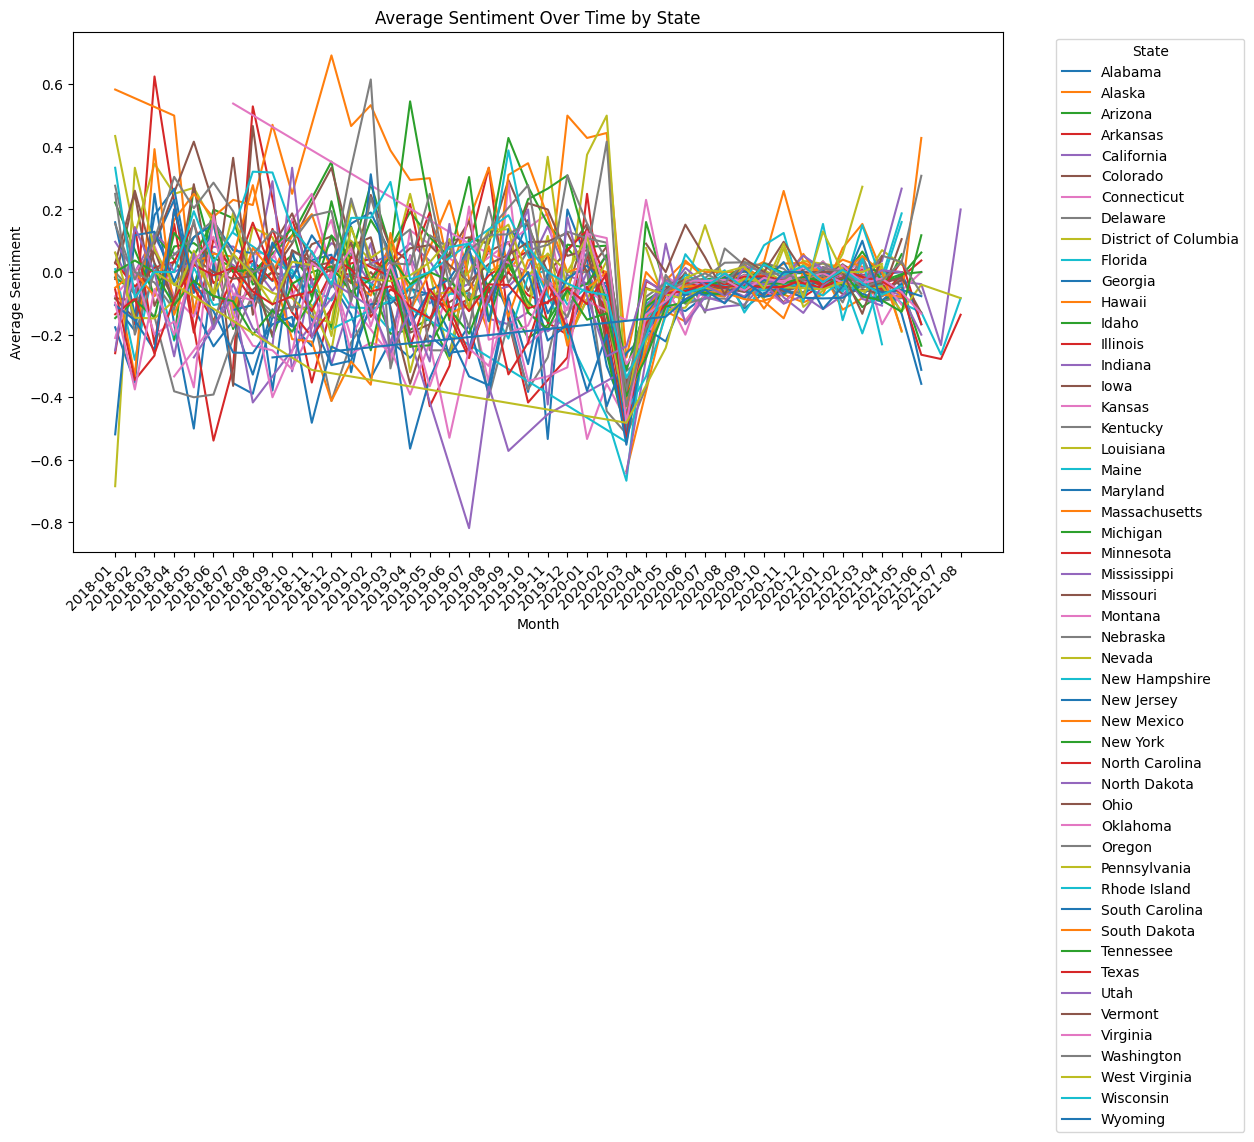

In [11]:
# Plotting the line chart for average sentiment over time
plt.figure(figsize=(12, 8)) 

# Plot a line for each state's average sentiment over time
for state in result_df['state'].unique():
    state_data = result_df[result_df['state'] == state]
    plt.plot(state_data['month'].astype(str), state_data['average_sentiment'], label=state)

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment Over Time by State')

# Adjust x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Position the legend outside the plot for more space
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout with some margin
plt.subplots_adjust(bottom=0.2, top=0.85)  # Adjust margins manually

# Show the plot
plt.show()

In [12]:
# Now proceed with filtering as usual
result_df = result_df[(result_df['month'] >= '2020-04') & (result_df['month'] <= '2021-05')]
result_df

,state,month,review_count,total_sentiment,average_sentiment
27,Alabama,2020-04,50,-10,-0.200000
28,Alabama,2020-05,173,-19,-0.109827
29,Alabama,2020-06,209,-26,-0.124402
30,Alabama,2020-07,457,-35,-0.076586
31,Alabama,2020-08,372,-8,-0.021505
...,...,...,...,...,...
2206,Wyoming,2020-12,39,0,0.000000
2207,Wyoming,2021-01,34,-4,-0.117647
2208,Wyoming,2021-02,22,-1,-0.045455
2209,Wyoming,2021-03,30,3,0.100000


In [13]:
# Save the 'filtered_county' as a CSV file
file_path = './sentiment_validation.csv'
result_df.to_csv(file_path, index=False)

file_path

'./sentiment_validation.csv'